In [ ]:
!pip install matplotlib_scalebar

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from google.colab import drive
from matplotlib_scalebar.scalebar import ScaleBar
drive.mount('/content/drive')


ModuleNotFoundError: No module named 'matplotlib_scalebar'

In [ ]:
%cd drive/MyDrive/30daymapchallenge/01_organic_soil/

/content/drive/MyDrive/30daymapchallenge/01_organic_soil


In [ ]:
orgsoil = gpd.read_file("thuenen_kulisse_orgboeden_v1.shp")
de_states = gpd.read_file("geoBoundaries-DEU-ADM1.shp", encoding = 'utf-8').set_crs(crs = 'WGS84').to_crs(orgsoil.crs)

In [ ]:
orgsoil.crs

<Projected CRS: EPSG:25832>
Name: ETRS89 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°E and 12°E: Austria; Belgium; Denmark - onshore and offshore; Germany - onshore and offshore; Norway including - onshore and offshore; Spain - offshore.
- bounds: (6.0, 38.76, 12.01, 84.33)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
orgsoil.head()

,BL,GENESE,DECKE,TORFMAECHT,ABMOORIGKE,TIEFUMBRUC,MUDDE,UNTERLAGER,MASSSTAB,AREA_HA,AREA_HA_R,AREA_HA_WG,AREA_HA_01,KAT_KURZ,KAT_LANG,geometry
0,mv,NH,DK0,TM4,AB0,TR0,MD0,LGs,1:25.000,0.129772,0.13,0.129726,0.13,NH,Niedermoorboden,"POLYGON ((716851.308 6020528.452, 716851.401 6..."
1,ni,HH,DK0,TM5,AB0,TR0,MD0,LGx,1:50.000,41.129875,41.13,41.161281,41.16,HH,Hochmoorboden,"POLYGON ((538823.209 5733594.389, 538814.895 5..."
2,hb,NH,DK0,TM4,AB0,TR0,MD0,LGx,1:25.000,0.246386,0.25,0.246578,0.25,NH,Niedermoorboden,"POLYGON ((472048.418 5938122.966, 472037.942 5..."
3,by,NH,DK0,TM3,AB0,TR0,MDx,LGx,1:1.000 und 1:25.000,0.433789,0.43,0.434049,0.43,NH,Niedermoorboden,"POLYGON ((590357.089 5236799.455, 590346.601 5..."
4,be,NH,DK0,TM4,AB0,TR0,MDx,LGs,1:5.000,1.869939,1.87,1.867228,1.87,NH,Niedermoorboden,"POLYGON ((802912.15 5842364.268, 802903.643 58..."


<Axes: >

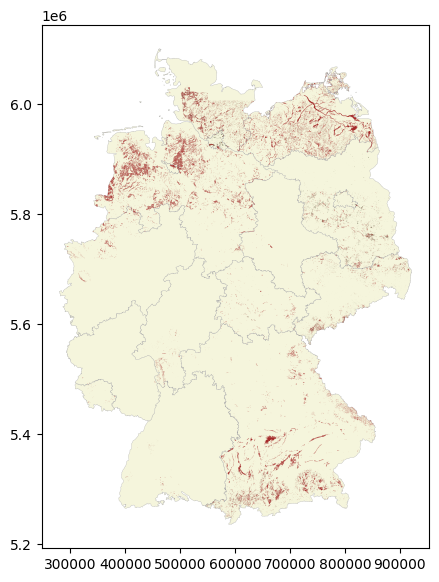

In [ ]:
fig, ax = plt.subplots(figsize=(5, 7))
de_states.plot(ax = ax, color = 'beige', edgecolor = 'darkgrey', linewidth =  0.2)
orgsoil.plot(ax = ax, color = 'brown')

In [ ]:
de_states

,shapeName,shapeISO,shapeID,shapeGroup,shapeType,geometry
0,Baden-Württemberg,DE-BW,10402087B60055985875400,DEU,ADM1,"MULTIPOLYGON (((509453.986 5279479.818, 509441..."
1,Bayern,DE-BY,10402087B60477050509260,DEU,ADM1,"POLYGON ((545271.755 5270278.41, 545463.849 52..."
2,Berlin,DE-BE,10402087B20892132820961,DEU,ADM1,"POLYGON ((802831.687 5845501.783, 802754.455 5..."
3,Brandenburg,DE-BB,10402087B40185768535592,DEU,ADM1,"MULTIPOLYGON (((780229.39 5729627.678, 780843...."
4,Bremen,DE-HB,10402087B44391416804171,DEU,ADM1,"MULTIPOLYGON (((474373.709 5894257.104, 474294..."
5,Hamburg,DE-HH,10402087B45896528657515,DEU,ADM1,"MULTIPOLYGON (((586894.009 5921258.989, 586842..."
6,Hessen,DE-HE,10402087B85226028911536,DEU,ADM1,"MULTIPOLYGON (((507446.648 5491657.147, 507257..."
7,Mecklenburg-Vorpommern,DE-MV,10402087B60782008682549,DEU,ADM1,"MULTIPOLYGON (((659349.246 5979824.277, 659353..."
8,Niedersachsen,DE-NI,10402087B38053019909436,DEU,ADM1,"MULTIPOLYGON (((358694.242 5940148.225, 358728..."
9,Nordrhein-Westfalen,DE-NW,10402087B86022102756745,DEU,ADM1,"MULTIPOLYGON (((301890.303 5600399.203, 301901..."


In [ ]:
def subset_state(gdf, state, soil, ax, pad = 1500 * 10^3):

  subs = gdf[gdf.shapeName == state]
  gdf.plot(color = 'teal', ax = ax)
  gdf[gdf.shapeName == state].plot(color = 'teal', ax = ax, edgecolor = 'mintcream')
  gpd.clip(soil, gdf[gdf.shapeName == state]).plot(color = 'black', ax = ax)

  xmin, ymin, xmax, ymax = de_states[de_states.shapeName == state].total_bounds
  ax.set_xlim(xmin-pad, xmax+pad)
  ax.set_ylim(ymin-pad, ymax+pad)

  ax.set_xticks([])
  ax.set_yticks([])
  ax.tick_params(labelleft=False, labelbottom=False)
  ax.set_facecolor('cadetblue')

  return ax


<Axes: >

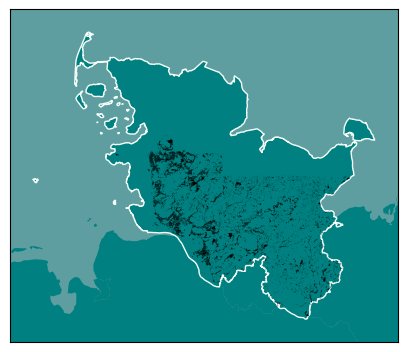

In [ ]:
fig, ax = plt.subplots(figsize = (5,5))
subset_state(gdf = de_states, state = 'Schleswig-Holstein',soil = orgsoil, ax = ax)

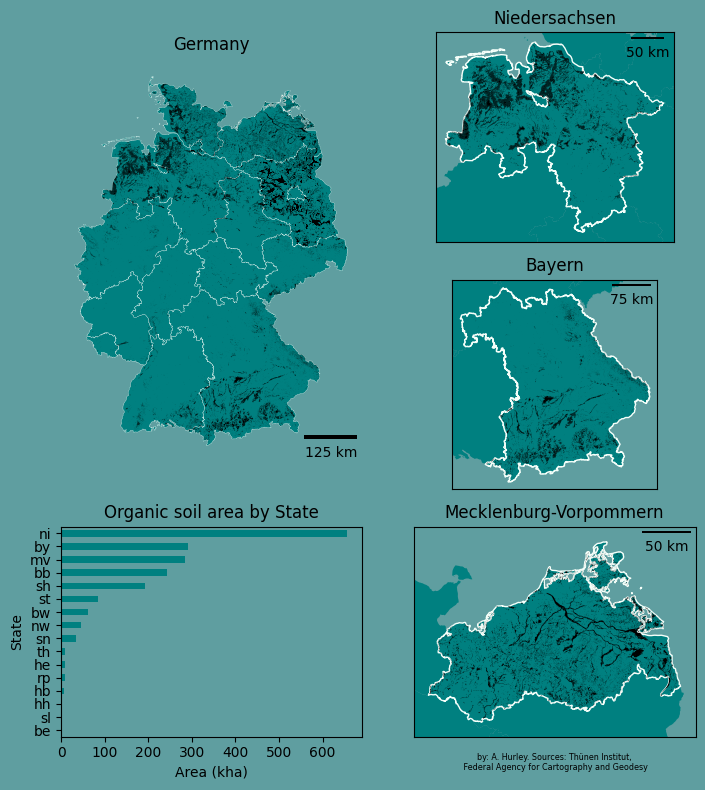

In [ ]:
import matplotlib.gridspec as gridspec

# Create a figure
fig = plt.figure(figsize=(8, 8))  # Adjust figure size as needed
fig.set_facecolor('cadetblue')

# Define the grid layout with 2 columns, with width ratios [0.65, 0.35] and 3 rows in the second column
gs = gridspec.GridSpec(3, 2, width_ratios=[0.4, 0.6], height_ratios=[1, 1, 1])

# First column, covering all rows (single full-height plot)
ax_main = fig.add_subplot(gs[0:2, 0])  # This spans first two rows in the first column
ax_main.set_title("Germany")
ax_main.set_facecolor('cadetblue')
ax_main.add_artist(ScaleBar(1, box_alpha = 0, location = 'lower right'))

de_states.plot(ax = ax_main, color = 'teal', edgecolor = 'mintcream', linewidth =  0.2)
orgsoil.plot(ax = ax_main, color = 'black')



# Second column, with three equally sized square subplots
ax0 = fig.add_subplot(gs[2,0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 1])
ax3 = fig.add_subplot(gs[2, 1])


for axi, st in zip([ax1, ax2, ax3], ['Niedersachsen', 'Bayern', 'Mecklenburg-Vorpommern']):
# Titles for each subplot (optional)
  subset_state(gdf = de_states, state = st,soil = orgsoil, ax = axi)
  axi.set_title(st)
  axi.add_artist(ScaleBar(1,box_alpha = 0))

ax3.set_xlabel('\nby: A. Hurley. Sources: Thünen Institut,\n Federal Agency for Cartography and Geodesy', fontsize = 'xx-small')

orgsoil[['BL','AREA_HA']].groupby('BL').sum().apply(lambda x: x/1000).sort_values(['AREA_HA']).plot.barh(color = 'teal', legend = None, ax = ax0)
ax0.set_ylabel("State")
ax0.set_xlabel("Area (kha)")
ax0.set_facecolor('cadetblue')
ax0.set_title("Organic soil area by State")

# Set aspect ratio to 1:1 for subplots in the second column
for ax in [ax1, ax2, ax3]:
    ax.set_aspect('equal', 'box')

ax_main.axis('off')


# Adjust layout
plt.tight_layout()
# plt.show()

In [ ]:
from google.colab import files

plt.savefig('germany_organic_soil.svg', dpi=300)
plt.savefig('germany_organic_soil.png', dpi=fig.dpi)
files.download('germany_organic_soil.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

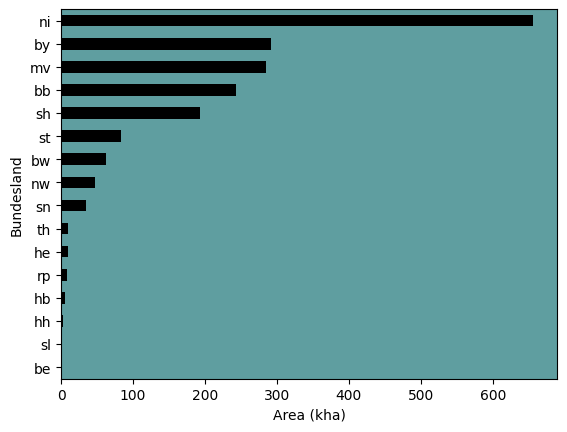

In [ ]:
ax = orgsoil[['BL','AREA_HA']].groupby('BL').sum().apply(lambda x: x/1000).sort_values(['AREA_HA']).plot.barh(color = 'black', legend = None)


ax.set_ylabel("Bundesland")
ax.set_xlabel("Area (kha)")
ax.set_facecolor('cadetblue')

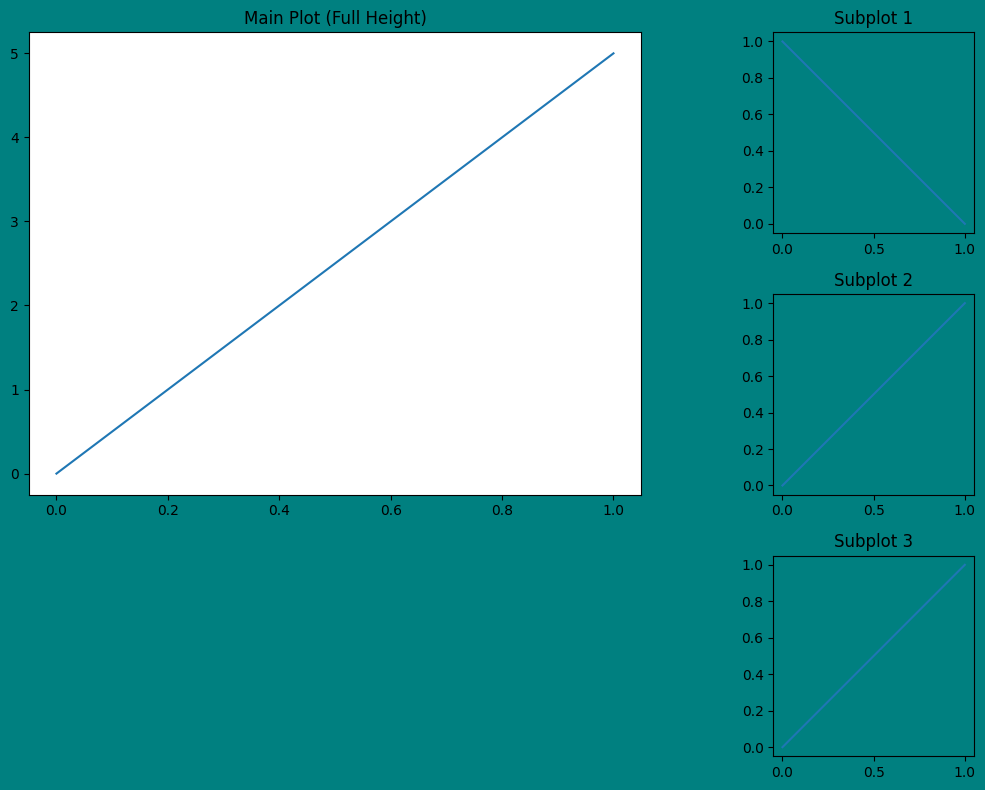

In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.gridspec as gridspec

# # Create a figure
# fig = plt.figure(figsize=(12, 8))  # Adjust figure size as needed

# # Define the grid layout with 2 columns, with width ratios [0.65, 0.35] and 3 rows in the second column
# gs = gridspec.GridSpec(3, 2, width_ratios=[0.5, 0.5], height_ratios=[1, 1, 1])

# # First column, covering all rows (single full-height plot)
# ax_main = fig.add_subplot(gs[0:2, 0])
# ax_main.set_title("Main Plot (Full Height)")
# ax_main.plot([0, 1], [0, 5])  # Example plot, replace with your data

# # Second column, with three equally sized square subplots
# ax1 = fig.add_subplot(gs[0, 1])
# ax2 = fig.add_subplot(gs[1, 1])
# ax3 = fig.add_subplot(gs[2, 1])

# # Titles for each subplot (optional)
# ax1.set_title("Subplot 1")
# ax2.set_title("Subplot 2")
# ax3.set_title("Subplot 3")

# # Example plots for each subplot (replace with your data)
# ax1.plot([0, 1], [1, 0])  # Placeholder
# ax2.plot([0, 1], [0, 1])  # Placeholder
# ax3.plot([0, 1], [0, 1])  # Placeholder

# # Set aspect ratio to 1:1 for subplots in the second column
# for ax in [ax1, ax2, ax3]:
#     ax.set_aspect('equal', 'box')
#     ax.set_facecolor('teal')


# fig.set_facecolor('teal')
# # Adjust layout
# plt.tight_layout()
# plt.show()
